## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 126us/step - loss: 2.2694 - acc: 0.1618 - val_loss: 2.2214 - val_acc: 0.2156
Epoch 2/500
50000/50000 [==============================] - 6s 118us/step - loss: 2.1883 - acc: 0.2245 - val_loss: 2.1562 - val_acc: 0.2497
Epoch 3/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.1293 - acc: 0.2526 - val_loss: 2.1024 - val_acc: 0.2647
Epoch 4/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.0801 - acc: 0.2682 - val_loss: 2.0582 - val_acc: 0.2799
Epoch 5/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.0408 - acc: 0.2828 - val_loss: 2.0229 - val_acc: 0.2937
Epoch 6/500
50000/50000 [==============================] - 6s 118us/step - loss: 2.0075 - acc: 0.2966 - val_loss: 1.9921 - val_acc: 0.3045
Epoch 7/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.9788 - acc: 0.3075 - val_loss: 1.

50000/50000 [==============================] - 7s 146us/step - loss: 1.6391 - acc: 0.4307 - val_loss: 1.6494 - val_acc: 0.4252
Epoch 60/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.6362 - acc: 0.4330 - val_loss: 1.6489 - val_acc: 0.4266
Epoch 61/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6334 - acc: 0.4328 - val_loss: 1.6436 - val_acc: 0.4264
Epoch 62/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.6305 - acc: 0.4321 - val_loss: 1.6411 - val_acc: 0.4289
Epoch 63/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6275 - acc: 0.4358 - val_loss: 1.6380 - val_acc: 0.4284
Epoch 64/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.6247 - acc: 0.4353 - val_loss: 1.6359 - val_acc: 0.4291
Epoch 65/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6219 - acc: 0.4355 - val_loss: 1.6341 - val_acc: 0.4318
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 136us/step - loss: 1.5051 - acc: 0.4763 - val_loss: 1.5459 - val_acc: 0.4569
Epoch 118/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.5033 - acc: 0.4762 - val_loss: 1.5403 - val_acc: 0.4570
Epoch 119/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.5014 - acc: 0.4756 - val_loss: 1.5345 - val_acc: 0.4649
Epoch 120/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.5002 - acc: 0.4764 - val_loss: 1.5317 - val_acc: 0.4597
Epoch 121/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.4981 - acc: 0.4786 - val_loss: 1.5344 - val_acc: 0.4615
Epoch 122/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.4963 - acc: 0.4787 - val_loss: 1.5309 - val_acc: 0.4579
Epoch 123/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4943 - acc: 0.4793 - val_loss: 1.5300 - val_acc: 0.4626
Epoch 124/500
50000/50000 [

Epoch 175/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.4085 - acc: 0.5091 - val_loss: 1.4678 - val_acc: 0.4842
Epoch 176/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.4068 - acc: 0.5085 - val_loss: 1.4705 - val_acc: 0.4844
Epoch 177/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4052 - acc: 0.5096 - val_loss: 1.4716 - val_acc: 0.4833
Epoch 178/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.4035 - acc: 0.5096 - val_loss: 1.4792 - val_acc: 0.4802
Epoch 179/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.4018 - acc: 0.5107 - val_loss: 1.4660 - val_acc: 0.4838
Epoch 180/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.4005 - acc: 0.5123 - val_loss: 1.4685 - val_acc: 0.4816
Epoch 181/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.3991 - acc: 0.5124 - val_loss: 1.4622 - val_acc: 0.4839
Epoch 182/5

50000/50000 [==============================] - 8s 160us/step - loss: 1.3251 - acc: 0.5380 - val_loss: 1.4316 - val_acc: 0.4934
Epoch 234/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.3236 - acc: 0.5395 - val_loss: 1.4305 - val_acc: 0.4892
Epoch 235/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3220 - acc: 0.5390 - val_loss: 1.4246 - val_acc: 0.4953
Epoch 236/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3204 - acc: 0.5380 - val_loss: 1.4191 - val_acc: 0.4998
Epoch 237/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.3193 - acc: 0.5400 - val_loss: 1.4201 - val_acc: 0.5031
Epoch 238/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3188 - acc: 0.5397 - val_loss: 1.4163 - val_acc: 0.4999
Epoch 239/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3171 - acc: 0.5405 - val_loss: 1.4215 - val_acc: 0.4985
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 11s 221us/step - loss: 1.2515 - acc: 0.5624 - val_loss: 1.3936 - val_acc: 0.5082
Epoch 292/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2492 - acc: 0.5635 - val_loss: 1.3892 - val_acc: 0.5121
Epoch 293/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2496 - acc: 0.5627 - val_loss: 1.3860 - val_acc: 0.5114
Epoch 294/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.2481 - acc: 0.5646 - val_loss: 1.4136 - val_acc: 0.5063
Epoch 295/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.2469 - acc: 0.5645 - val_loss: 1.3796 - val_acc: 0.5188
Epoch 296/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.2451 - acc: 0.5647 - val_loss: 1.3825 - val_acc: 0.5104
Epoch 297/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.2439 - acc: 0.5648 - val_loss: 1.3780 - val_acc: 0.5138
Epoch 298/500
50000/5000

50000/50000 [==============================] - 6s 120us/step - loss: 1.1842 - acc: 0.5866 - val_loss: 1.3762 - val_acc: 0.5155
Epoch 350/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1829 - acc: 0.5853 - val_loss: 1.3769 - val_acc: 0.5128
Epoch 351/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1812 - acc: 0.5879 - val_loss: 1.3783 - val_acc: 0.5154
Epoch 352/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1803 - acc: 0.5893 - val_loss: 1.3620 - val_acc: 0.5215
Epoch 353/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1790 - acc: 0.5880 - val_loss: 1.3721 - val_acc: 0.5185
Epoch 354/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1785 - acc: 0.5883 - val_loss: 1.3587 - val_acc: 0.5198
Epoch 355/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1781 - acc: 0.5891 - val_loss: 1.3751 - val_acc: 0.5136
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 138us/step - loss: 1.1204 - acc: 0.6094 - val_loss: 1.3411 - val_acc: 0.5270
Epoch 408/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1199 - acc: 0.6094 - val_loss: 1.4045 - val_acc: 0.5095
Epoch 409/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1203 - acc: 0.6084 - val_loss: 1.3489 - val_acc: 0.5239
Epoch 410/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1174 - acc: 0.6101 - val_loss: 1.3368 - val_acc: 0.5249
Epoch 411/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1170 - acc: 0.6097 - val_loss: 1.3626 - val_acc: 0.5184
Epoch 412/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1155 - acc: 0.6112 - val_loss: 1.3487 - val_acc: 0.5263
Epoch 413/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1143 - acc: 0.6104 - val_loss: 1.3514 - val_acc: 0.5255
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 113us/step - loss: 1.0617 - acc: 0.6317 - val_loss: 1.3907 - val_acc: 0.5136
Epoch 466/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.0593 - acc: 0.6304 - val_loss: 1.3400 - val_acc: 0.5275
Epoch 467/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.0596 - acc: 0.6302 - val_loss: 1.3606 - val_acc: 0.5288
Epoch 468/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.0566 - acc: 0.6329 - val_loss: 1.3560 - val_acc: 0.5250
Epoch 469/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0549 - acc: 0.6328 - val_loss: 1.3427 - val_acc: 0.5297
Epoch 470/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.0545 - acc: 0.6328 - val_loss: 1.3449 - val_acc: 0.5280
Epoch 471/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.0537 - acc: 0.6330 - val_loss: 1.4302 - val_acc: 0.5028
Epoch 472/500
50000/50000 [

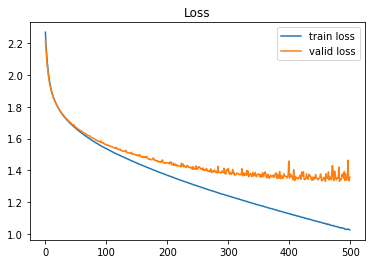

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()


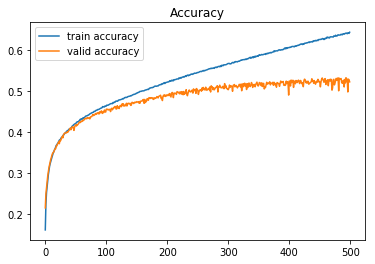

In [10]:

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()